<a href="https://colab.research.google.com/github/hyeyoungkoh/Instantaneous-Center-Method-for-Diaphragms/blob/main/diaphragm_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/hyeyoungkoh/Instantaneous-Center-Method-for-Diaphragms.git
%cd Instantaneous-Center-Method-for-Diaphragms
from group import *
from IC import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Mounted at /content/drive
Cloning into 'Instantaneous-Center-Method-for-Diaphragms'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 80 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (80/80), 71.99 KiB | 4.80 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/Instantaneous-Center-Method-for-Diaphragms


# **<font color='red'>Get Fastener Layout</font>**
To estimate the shear strength of a diaphragm with fasteners, you first need the coordinates of those fasteners. 'group.py' provides four different group functions:
1. 'support_group' for interior support fasteners
2. 'end_group' for end support fasteners
3. 'edge_group' for edge support fasteners
4. 'side_group' for side-lap fasteners.
To manually obtain the coordinates, input values into the group functions. Each function requires four inputs: Number of columns, Number of rows, Column spacing, Row spacing.


In [ ]:
#WB 14 in DDM 1st Ed, no side-lap fasteners
interior_x, interior_y = support_group(3, 17, 60, 12)
end_x, end_y = end_group(2, 8, 20*12, 24)
# edge_x, edge_y = support_group(3, 2, 24, 16*12)
edge_x = []
edge_y = []
# side_x, side_y = side_group(5, 6, 48, 30)
side_x = [] # If your diaphragm has no side-lap fasteners, you can use [], which represent blank.
side_y = [] # If your diaphragm has no side-lap fasteners, you can use [], which represent blank.

interior_x, interior_y = support_group(2,31,5*12,6)
end_x,end_y = end_group(2,25,15*12,15*12/26)
edge_x, edge_y = support_group(18, 2, 10, 15*12)
side_x, side_y = side_group(27, 4, 15*12/28, 36)




In [ ]:
arc_x = interior_x + end_x
arc_y = interior_y + end_y

screw_x = side_x+ edge_x
screw_y = side_y+ edge_y

df_arc = pd.DataFrame({'x': arc_x, 'y': arc_y})
df_arc['Fastener type'] = 'Arc spot weld'
df_arc.index = np.arange(1, len(df_arc)+1)

df_screw = pd.DataFrame({'x':screw_x, 'y': screw_y})
df_screw['Fastener type'] = 'Screw'
df_screw.index = np.arange(len(df_arc)+1, len(df_screw) + len(df_arc)+1)

In [ ]:
decimals = pd.Series([0, 1, 1], index=['x', 'y', 'Fastener type'])
print(df_arc.round(decimals).to_string())


In [ ]:
print(df_screw.round(decimals).to_string())

        x     y Fastener type
149 -84.0 -54.0         Screw
150 -84.0 -18.0         Screw
151 -84.0  18.0         Screw
152 -84.0  54.0         Screw
153 -77.0 -54.0         Screw
154 -77.0 -18.0         Screw
155 -77.0  18.0         Screw
156 -77.0  54.0         Screw
157 -71.0 -54.0         Screw
158 -71.0 -18.0         Screw
159 -71.0  18.0         Screw
160 -71.0  54.0         Screw
161 -64.0 -54.0         Screw
162 -64.0 -18.0         Screw
163 -64.0  18.0         Screw
164 -64.0  54.0         Screw
165 -58.0 -54.0         Screw
166 -58.0 -18.0         Screw
167 -58.0  18.0         Screw
168 -58.0  54.0         Screw
169 -51.0 -54.0         Screw
170 -51.0 -18.0         Screw
171 -51.0  18.0         Screw
172 -51.0  54.0         Screw
173 -45.0 -54.0         Screw
174 -45.0 -18.0         Screw
175 -45.0  18.0         Screw
176 -45.0  54.0         Screw
177 -39.0 -54.0         Screw
178 -39.0 -18.0         Screw
179 -39.0  18.0         Screw
180 -39.0  54.0         Screw
181 -32.0 

**Fastener Layout Example**\
 Seven specimens from the SDII database are provided as layout examples: Pinkham (1999) Specimens 50 through 54 and Essa (2003) Specimens 11 and 15. You can select any of these examples to get the coordinates of the fasteners.

In [ ]:
# #Pinkham (1999) 50, 51
# interior_x, interior_y = support_group(2,31,5*12,6)
# end_x,end_y = end_group(2,25,15*12,15*12/26)
# edge_x, edge_y = support_group(18, 2, 10, 15*12)
# side_x, side_y = side_group(27, 4, 15*12/28, 36)

#Pinkham (1999) 52, 54
# interior_x, interior_y = support_group(1,22,10*12,21*12/23)
# end_x, end_y = end_group(2,14,20*12,21*12/15)
# edge_x, edge_y = support_group(18, 2, 20*12/19, 21*12)
# side_x, side_y = side_group(8, 6, 20*12/9, 36)

#Pinkham (1999) 53
# interior_x, interior_y = support_group(1,43,10*12,21*12/44)
# end_x,end_y = end_group(2,35,20*12,21*12/36)
# edge_x, edge_y = support_group(18, 2, 20*12/19, 21*12)
# side_x, side_y = side_group(8, 6, 20*12/9, 36)

#Essa (2003) 11, 15
# interior_x, interior_y = support_group(3, 13, 12*5, 12)
# end_x,end_y = end_group(2, 8, 20*12, 12*12/9)
# edge_x, edge_y = edge_group(16, 2, 20*12/17, 12*12)
# side_x, side_y = side_group(16, 3, 20*12/17, 36)


# **Illustrate Fastener Layout**
You can print out a diaphragm diagram with fasteners by using the codes below.

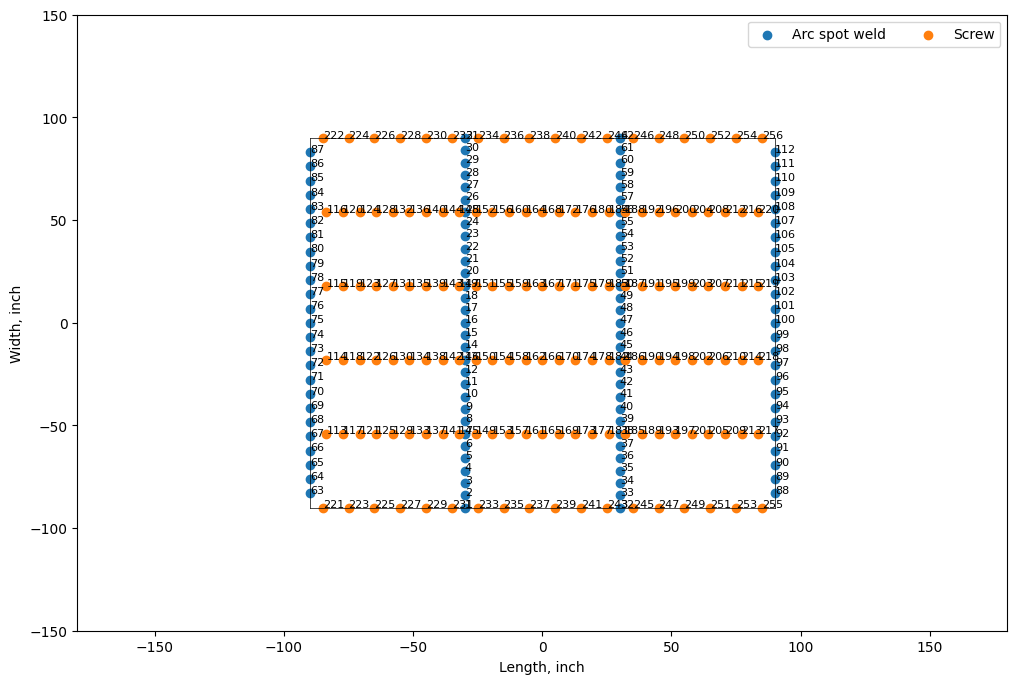

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (12,8))

plt.scatter(arc_x,arc_y,label='Arc spot weld')
plt.scatter(screw_x,screw_y,label='Screw')
plt.plot([end_x[0],end_x[0]],[interior_y[-1],interior_y[0]], c='k', linewidth=0.5)
plt.plot([end_x[0],end_x[-1]],[interior_y[0],interior_y[0]], c='k', linewidth=0.5)
plt.plot([end_x[-1],end_x[0]],[interior_y[-1],interior_y[-1]], c='k', linewidth=0.5)
plt.plot([end_x[-1],end_x[-1]],[interior_y[-1],interior_y[0]], c='k', linewidth=0.5)

for i in range(len(arc_x)):
    ax.annotate(i+1, (arc_x[i], arc_y[i]), fontsize=8)

for j in range(len(screw_x)):
    ax.annotate(j+1+len(arc_x), (screw_x[j], screw_y[j]), fontsize=8)

plt.xlim(-180,180)
plt.ylim(-150,150)
plt.xlabel('Length, inch')
plt.ylabel('Width, inch')
plt.legend(ncol=2)
plt.show()

# **<font color='red'>Get Load-Deformation Inputs for Screws and Arc-Spot Welds</font>**
After determining the fastener layout of your diaphragm, you need load-deformation inputs for screws and arc-spot welds. These inputs include maximum load, stiffness, and maximum deformation. We offer load-deformation inputs for screws and arc-spot welds based on sheet thickness and diameter. The inputs were based on the load-deformation curves given in Snow and Easterling (2008) and Moen et al. (2014). Select geometries appropriate to your diaphragm. \

For **screws**, available thickenss (t_s) and diameter (d_s) pairs include:\
(0.034, 0.19), (0.047, 0.19) \
For **arc-spot welds**, available thickenss (t_a) and diameter (d_a) pairs include:\
(0.0299, 5/8), (0.034, 5/8), (0.046, 5/8), (0.057, 5/8), (0.046, 3/4), (0.0299, 3/4)




In [ ]:
t_s, d_s = (0.034, 0.19)
t_a, d_a = (0.0299, 5/8)

**Generate load-deformation inputs**

In [ ]:
# Load-deformation information of screw
if t_s == 0.034 and d_s == 0.19:
    P_f_side = 0.75  # max load, kips
    k_side = 35.97 # stiffness, kips/in

elif t_s == 0.047 and d_s ==0.19:
    k_side = 41.54 # kips/in
    P_f_side = 1.22 # kips

delta_f_side = 0.121 # in, max deformation of screws

# Load-deformation information of arc spot welds
if t_a == 0.0299 and d_a == 5/8:
    P_f_arc = 1.81 # max load, kips
    k_arc = 44 # stiffness, kip/in

elif t_a == 0.034 and d_a == 5/8:
    P_f_arc = 2.2 # max load, kips
    k_arc = 48 # stiffness, kip/in

elif t_a == 0.046 and d_a == 5/8:
    P_f_arc = 3.24 # max load, kips
    k_arc = 55 # stiffness, kip/in

elif t_a == 0.057 and d_a == 5/8:
    P_f_arc = 4.19 # max load, kips
    k_arc = 47 # stiffness, kip/in

elif t_a == 0.046 and d_a == 3/4:
    P_f_arc = 4 # kips # max load
    k_arc = 36.07 # stiffness, kip/in

elif t_a == 0.0299 and d_a == 3/4:
    P_f_arc = 1.85 # max load, kips
    k_arc = 32.542 # stiffness, kip/in

# maximum deformation of arc spot welds, we assumed 0.12 inch based on Snow and Easterling (2008)
delta_f_arc = 0.12 # in

# **<font color='red'>Get Diaphragm Length (L) and Width (W) in ft</font>**

In [ ]:
L = 20 #diaphragm length, ft
W = 16 #diaphragm width, ft

# **Calculate Diaphragm Strength**
Once you have obtained the required information (the fastener layout, load-deformation data, diaphragm dimensions), you can determine the diaphragm strength.


In [ ]:
strength = IC(support_x, support_y, side_x, side_y, k_arc,
          delta_f_arc, P_f_arc, k_side, delta_f_side, P_f_side, 0, W*12/2, 90)

print('Shear strength = {:6.2f} kips'.format(strength[2]))
print('Shear strength = {:6.2f} kips/ft'.format(strength[2]/L))


Shear strength =  18.09 kips
Shear strength =   0.90 kips/ft
